# Ransomware Attacks-EDA

Ransomware Attacks-EDA
About 360 ransomware attacks, including target, sector, organization size, ransom amount, and if the ransom was paid. Work in progress still.
May need a bit of data cleaning.

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
ransom = pd.read_csv('D:/Linked Drive/Study Materials-UIU/Research Papers/Ransomeware/new-dataset/Ransomware Attacks - Ransomware Attacks.csv')
ransom.head(5)

,Target,AKA,description,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
0,Kaseya,NaN,NaN,tech,300,300.0,70,70.0,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
1,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
2,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
3,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
4,Lucky Star Casino,NaN,NaN,NaN,1,9.0,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355


In [12]:
ransom.tail(5)

,Target,AKA,description,sector,"organisation size 1,5,10,25,100,300",revenue $USD million,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
353,"""TeslaCrypt""",Multiple systems,NaN,mixed,5,1.0,76520,0.07652,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
354,New Hampshire PD,NaN,NaN,government,1,1.0,$2000-$3000,0.00300,cost,unknown,...,NaN,NaN,repair costs were $2000-$3000,NaN,https://www.nbcnews.com/tech/security/virus-wi...,NaN,NaN,NaN,NaN,4
355,Apple devices,NaN,NaN,mixed,1,1.0,$100 per device,5.00000,NaN,unknown,...,NaN,NaN,$100 per device or $50 per device. Payment was...,NaN,https://nakedsecurity.sophos.com/2014/05/27/ap...,NaN,NaN,NaN,NaN,3
356,"""Cryptowall""",Multiple systems,NaN,mixed,25,1.0,18,18.00000,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
357,"""Cryptolocker""","250,000 systems",NaN,mixed,100,1.0,27,27.00000,NaN,unknown,...,NaN,NaN,NaN,NaN,https://digitalguardian.com/blog/history-ranso...,NaN,NaN,NaN,NaN,1


In [13]:
ransom.dtypes

Target                                   object
AKA                                      object
description                              object
sector                                   object
organisation size 1,5,10,25,100,300       int64
revenue $USD million                    float64
cost                                     object
ransom cost                             float64
data note                                object
ransom paid                              object
YEAR code                                 int64
YEAR                                      int64
month                                    object
location                                 object
interesting story (edited)              float64
interesting story (long)                 object
interesting story?                       object
Ransomware                               object
stock symbol                             object
revenue as of                            object
no of employees                         

In [17]:
ransom.duplicated().sum()

0

In [18]:
ransom.columns

Index(['Target', 'AKA', 'description ', 'sector',
       'organisation size 1,5,10,25,100,300 ', 'revenue $USD million ', 'cost',
       'ransom cost', 'data note', 'ransom paid', 'YEAR code', 'YEAR', 'month',
       'location', 'interesting story (edited)', 'interesting story (long)',
       'interesting story?', 'Ransomware', 'stock symbol', 'revenue as of',
       'no of employees', 'Data Note', 'Source Name', 'URL', 'URL 2', 'URL 3',
       'URL 4', 'URL 5', '#ID'],
      dtype='object')

In [19]:
columnsdrop = [
    'URL', 'URL 2', 'URL 3', 'URL 4', 'URL 5', '#ID', 'AKA',
    'interesting story (edited)', 'interesting story (long)', 'interesting story?', 
    'stock symbol', 'revenue as of', 'no of employees', 'Data Note', 'Source Name' , 'YEAR code' , 'data note' , 'ransom cost' , 'description '
]

ransom = ransom.drop(columns=columnsdrop)

<Axes: >

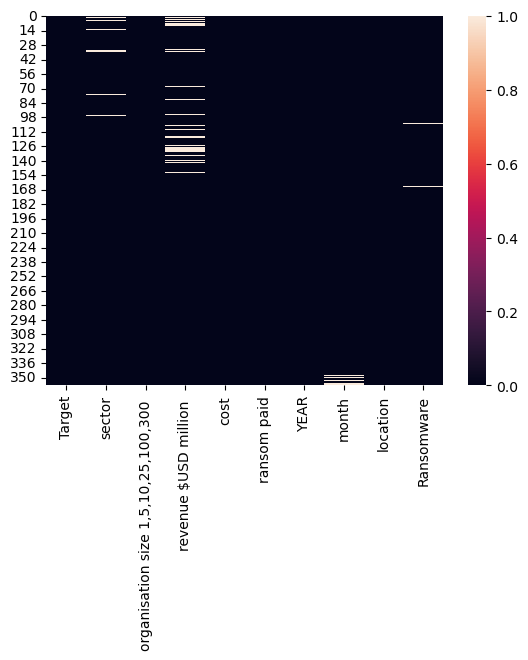

In [20]:
sns.heatmap(ransom.isna())

In [21]:
ransom = ransom.dropna()
ransom.isna().sum()

Target                                  0
sector                                  0
organisation size 1,5,10,25,100,300     0
revenue $USD million                    0
cost                                    0
ransom paid                             0
YEAR                                    0
month                                   0
location                                0
Ransomware                              0
dtype: int64

In [22]:
ransom.shape

(321, 10)

In [23]:
sector = ransom['sector'].value_counts()
sector

sector
tech                   57
healthcare             45
government             44
academic               36
logistics              22
finance                18
energy                 15
transport              13
retail                 12
media & sports          9
food & beverage         9
misc                    7
legal                   6
automotive              5
mixed                   5
gaming                  4
telecomms               4
telecoms                3
military                2
tech                    1
finace                  1
healthcare, tech        1
logistics, telecoms     1
media                   1
Name: count, dtype: int64

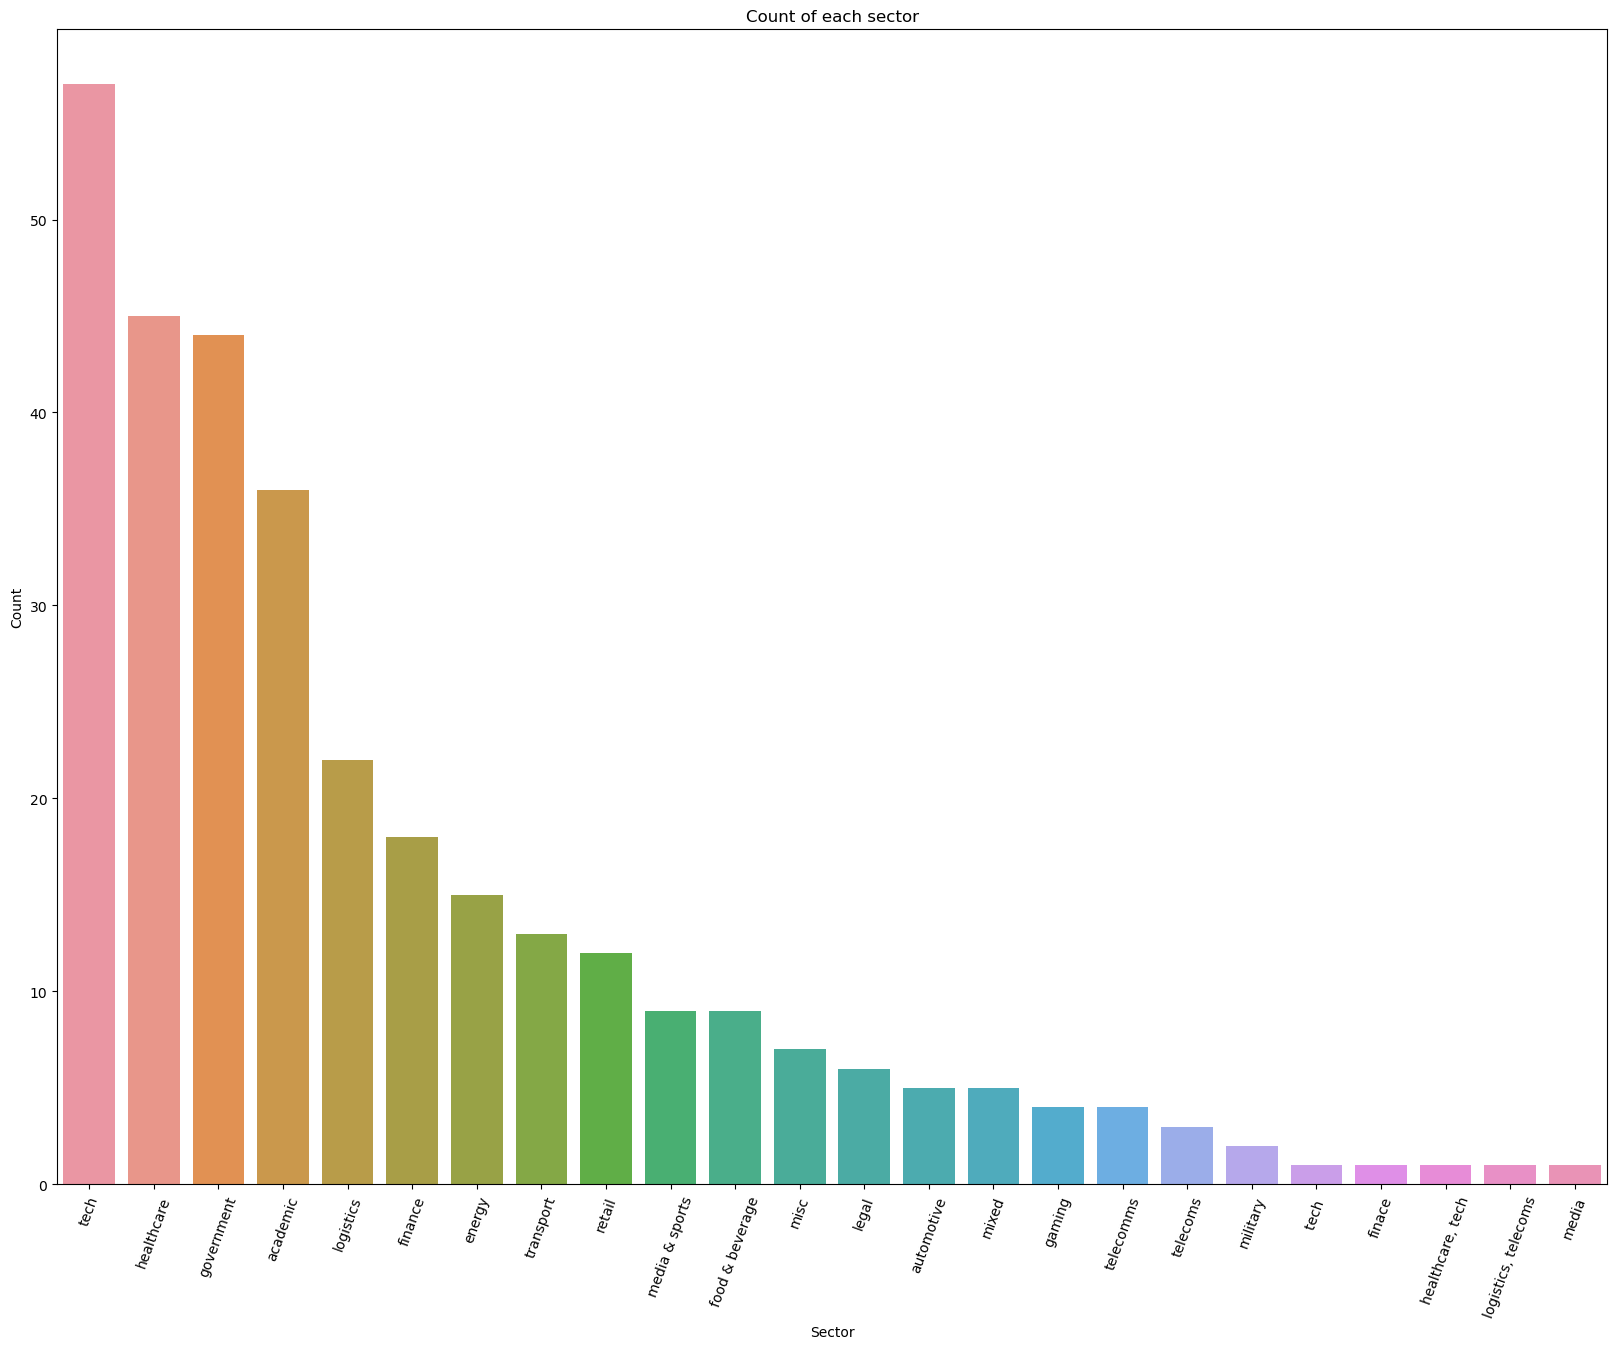

In [24]:

plt.figure(figsize=(20, 15))
plt.xticks(rotation=70, fontsize=10)
sns.set_palette("colorblind")
sns.barplot(x=sector.index, y=sector.values)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Count of each sector')

plt.show()



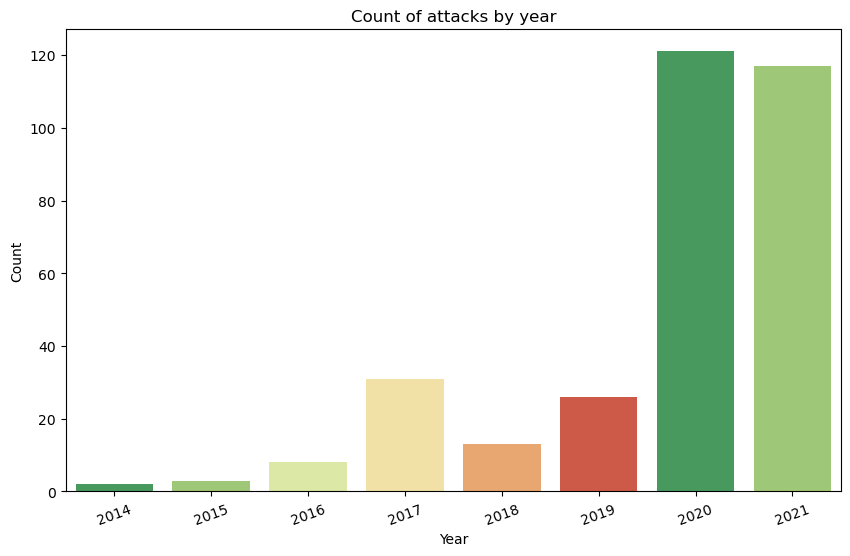

In [25]:


year = ransom['YEAR'].value_counts()
colors = sns.color_palette('RdYlGn_r')
plt.figure(figsize=(10, 6))
sns.barplot(x=year.index, y= year,  palette =colors)
plt.xticks(rotation=20, fontsize=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of attacks by year')
plt.show()



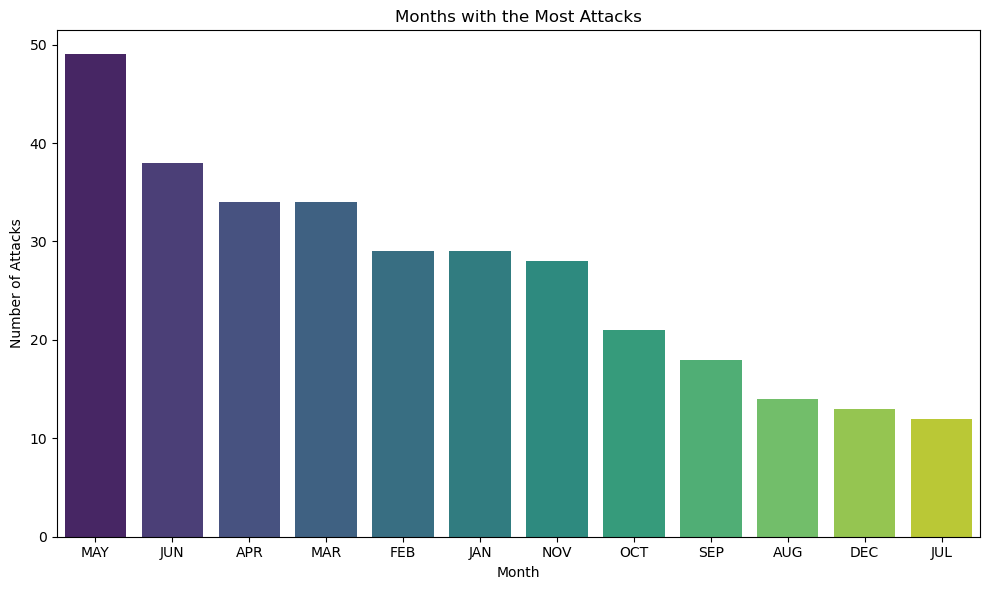

In [26]:
attacks_by_month = ransom['month'].value_counts()
sorted_months = attacks_by_month.sort_values(ascending=False)
sorted_monthshead = sorted_months.head(12)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_monthshead.index, y=sorted_monthshead.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Months with the Most Attacks')
plt.tight_layout()
plt.show()

In [27]:
ransom['location'].value_counts()

location
USA              138
UK                23
Australia         14
Germany           12
Canada            12
                ... 
Poland             1
Pakistan           1
New York, USA      1
Colorado, USA      1
Greece             1
Name: count, Length: 64, dtype: int64

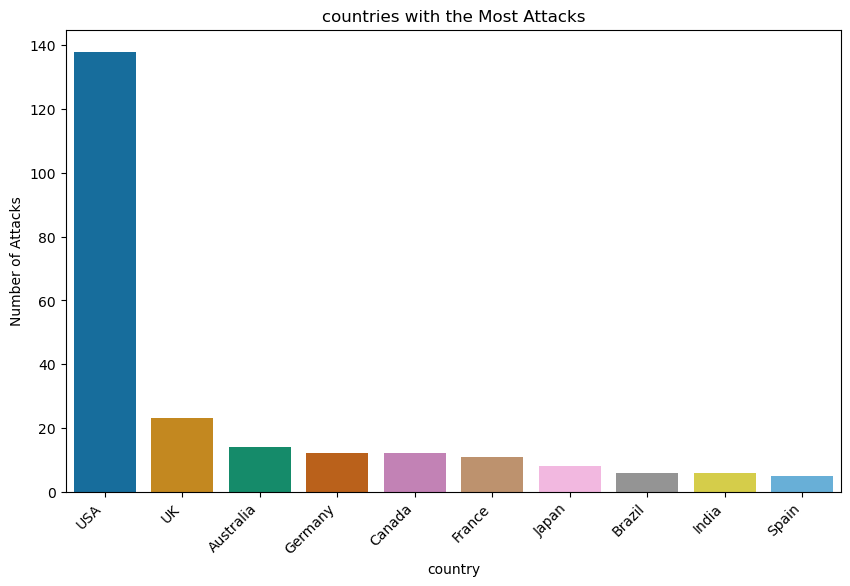

In [28]:
attacks_by_location = ransom['location'].value_counts()
top_locations = attacks_by_location.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('country')
plt.ylabel('Number of Attacks')
plt.title('countries with the Most Attacks')
plt.show()

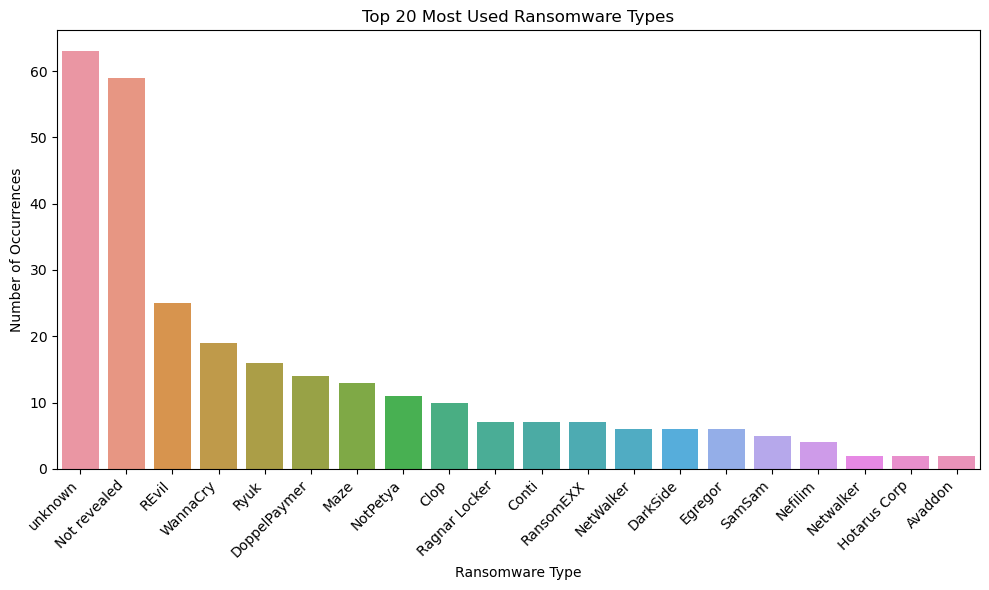

In [29]:
most_used_ransomware = ransom['Ransomware'].value_counts()
most_used_ransomware_head = most_used_ransomware.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_used_ransomware_head.index, y=most_used_ransomware_head.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ransomware Type')
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Most Used Ransomware Types')
plt.tight_layout()
plt.show()

EDA Performed by-
Rabbi Islam Yeasin
Student, Dept. of CSE,UIU